In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
feature_names = ['Frequency','Angle','Chord Length','velocity','displacement thickness','sound pressure']
airfoil = pd.read_csv("./airfoil_self_noise.csv",header=None,sep='\t',names=feature_names)

In [3]:
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airfoil = pd.DataFrame(airfoil)
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
frequency = pd.Series(airfoil['Frequency'])
frequency.value_counts().sort_values()

20000      6
16000     13
12500     25
200       35
250       42
10000     42
8000      52
315       56
400       69
500       78
630       88
6300      89
5000      95
800       97
1000      99
1250     100
4000     102
1600     103
3150     103
2500     104
2000     105
Name: Frequency, dtype: int64

In [6]:
data = pd.DataFrame(airfoil)
data.nunique()  # no. of unique values of each feature

Frequency                   21
Angle                       27
Chord Length                 6
velocity                     4
displacement thickness     105
sound pressure            1456
dtype: int64

In [7]:
corelation = airfoil.corr('pearson') 

In [8]:
corelation['sound pressure'].sort_values()

Frequency                -0.390711
displacement thickness   -0.312670
Chord Length             -0.236162
Angle                    -0.156108
velocity                  0.125103
sound pressure            1.000000
Name: sound pressure, dtype: float64

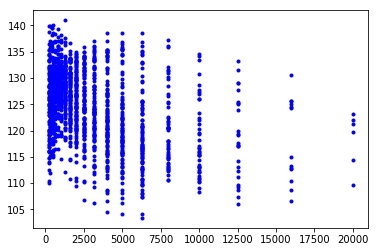

In [9]:
x= airfoil['Frequency']
y = airfoil['sound pressure']
plt.plot(x,y,'b.')

In [10]:
x = (x - x.min())/(x.max()-x.min())
y = (y - y.min())/(y.max()-y.min())

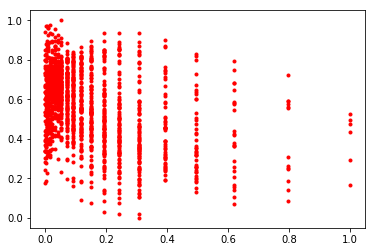

In [11]:
plt.plot(x,y,'r.')

In [12]:
x= np.array(x)
y = np.array(y)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
x_train.size

1202

In [15]:
len(x_test)

301

In [212]:
def hypothesis(a,x,b):
    return a*x +b

In [213]:
def error(a,x,b,y):
    e = 0
    m = len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b)-y[i]),2)
    return (1/(2*m))*e

In [214]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (1/m)*(hypothesis(a, x[i],b) - y[i])*x[i]  #partial differentiation
        grad_b += (1/m)*(hypothesis(a, x[i],b) - y[i])
        
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    
    return a,b

In [215]:
def descend(init_a,x,init_b,y,learning_rate,iterations):
    a = init_a
    b= init_b
    
    for i in range(iterations):
        e = error(a,x,b,y)
        
        if i % 1000 ==0:
            print(f"Error: {np.sqrt(e)}, a:{a}, b:{b}")
            
        a,b = step_gradient(a,x,b,y,learning_rate)
    
    return a,b

In [216]:
#  a                      b                    error                 accuracy(test)       l-rate   iteration
#  a = 0,                 b=0,                 0.1257600730118208,   -,                   0.001,   10000
# -0.02849951021584285,   0.5777301399428584,  0.12242922254612959,  -,                   0.001,   10000
# -0.11377402048918804,   0.5895293516584522,  0.11616014762226655,  0.8682777154698321,  0.001,   10000
# -0.4246712917195324,    0.6323298334317525,  0.11607631925650443,  0.8681108644416629,  0.1,     10000
# -0.4246712917195324,    0.6323298334317525,  0.1160884256376533,   0.8681864622187847,  0.01,    5000
# -0.4246712917195324,    0.6323298334317525,  0.1161097607808423,   0.8682506090342434,  0.001,   20000
# -0.43931603105497125,   0.6343459392844063,  0.11608965829411803,  0.8682065465150453,   ",      "
# -0.44856476019242486,   0.6356191894609058,  0.1160816396080158,   0.8681742520984771,   ",       "
# -0.4544056965654589,    0.6364232970477259,  0.11607716558838066,  0.8681367473970876,  0.002,   20000

In [217]:
a = -0.3536179990405861
b = -0.2419164177056968
learning_rate = 0.01
iterations = 50000

In [218]:
final_a,final_b = descend(a,x_train,b,y_train,learning_rate,iterations)

Error: 0.6192178479949804, a:-0.3536179990405861, b:-0.2419164177056968
Error: 0.12098371341423718, a:-0.28089907642224193, b:0.606757402778711
Error: 0.12048233341829499, a:-0.3152698073040513, b:0.6115599896644205
Error: 0.12017882535763652, a:-0.34197028070811863, b:0.6152669988422131
Error: 0.11999533857307648, a:-0.3627096901788632, b:0.6181463919293111
Error: 0.1198844996812979, a:-0.37881888406031994, b:0.6203829407358616
Error: 0.1198175776724765, a:-0.39133158978014015, b:0.6221201646621686
Error: 0.11977718353927105, a:-0.4010507480187822, b:0.6234695414167888
Error: 0.11975280596096118, a:-0.40860003743570883, b:0.6245176605442871
Error: 0.11973809583874982, a:-0.414463896146634, b:0.6253317798787619
Error: 0.11972921990813552, a:-0.4190186081311281, b:0.6259641414809662
Error: 0.11972386447558848, a:-0.4225564493862476, b:0.6264553240128258
Error: 0.1197206332671678, a:-0.42530444328553857, b:0.6268368466713208
Error: 0.11971868374035269, a:-0.42743892867535505, b:0.6271331

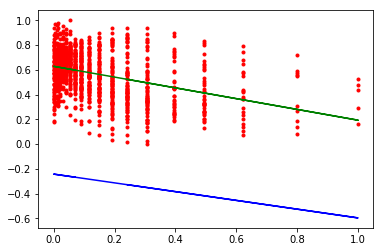

In [219]:
plt.plot(x_train,y_train,'r.',
         x_train,hypothesis(a,x_train,b),'b',
         x_train,hypothesis(final_a,x_train,final_b),'g')

In [220]:
final_a,final_b

(-0.43486446679534674, 0.6281641296706313)

In [221]:
x_test[:3]

array([0.19191919, 0.00580808, 0.49494949])

In [222]:
y_test[:3]                             

array([0.45932938, 0.67617731, 0.23370649])

In [223]:
hypothesis(final_a,x_test[:3],final_b)          

array([0.54470529, 0.6256384 , 0.41292818])

In [224]:
error = np.sqrt(error(final_a,x_test,final_b,y_test))
error

0.11802162160758735

In [225]:
1 - error

0.8819783783924127

In [ ]:
0.11974736027982184